In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('my_movies.csv',sep=',')
data1

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
data1.shape

(10, 15)

In [4]:
data1.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [5]:
data1.drop(labels= ['V1','V2','V3','V4','V5'],axis=1,inplace=True)

In [6]:
data1.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [7]:
data1.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

## 1. for support value = 0.09 and confidence value = 0.1,max value of item sets = 2

In [8]:
from mlxtend.frequent_patterns import apriori,association_rules

In [9]:
fre_item_sets = apriori(df=data1,min_support=0.09,use_colnames=True,max_len=2)
fre_item_sets.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [10]:
rules = association_rules(df = fre_item_sets, metric='confidence',min_threshold=0.1)

In [11]:
rules.shape

(40, 9)

In [12]:
rules.sort_values(by='lift',ascending=False,inplace=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
38,(Green Mile),(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8
25,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
24,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
31,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.5,5.0,0.08,1.8


## OBSERVATION

* Total 40 Rules have been ruled out. The top five rules with highest lift values states as follows:

   * Green Mile and LOTR are most likely to be watched together than watching buying LOTR alone
   * LOTR and Green Mile are most likely to be watched together than just watching Green Mile alone
   * LOTR2 and LOTR1 are most likely to be watched together than just watching LOTR1 alone
   * LOTR1 and LOTR2 are most likely to be watched together than just watching LOTR2 alone
   * Harry Potter2 and Harry Potter1 are most likely to be watched together than just watching Harry Potter1 alone

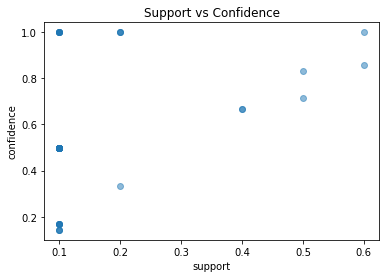

In [13]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

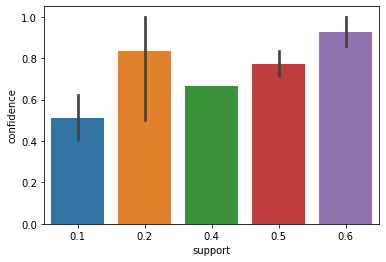

In [42]:
sns.barplot(x='support',y='confidence',data=rules)

## 2. for support value = 0.1 and confidence value = 0.2, max_length = 5

In [16]:
fre_item_sets1 = apriori(df=data1,min_support=0.1,use_colnames=True,max_len= 5)
fre_item_sets1.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [17]:
rules1 = association_rules(df = fre_item_sets1, metric='confidence',min_threshold=0.2)
rules1 .sort_values(by='lift',ascending=False,inplace=True)
rules1.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
186,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
129,"(LOTR2, Sixth Sense)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
119,"(Sixth Sense, LOTR)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
120,"(Green Mile, Gladiator)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf
160,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [18]:
rules1.shape

(220, 9)

## OBSERVATION

* Total 220 Rules have been ruled out. The top five rules with highest lift values states as follows:

   * (Harry Potter1, Sixth Sense) and (Green Mile, LOTR1) are most likely to be watched together than just watching (Green Mile, LOTR1) alone
   * (Gladiator, Green Mile, Sixth Sense) and (LOTR) are most likely to be watched together than just watching (LOTR) alone
   * (Sixth Sense, LOTR2) and (Green Mile, LOTR1) are most likely to be watched together than just watching (Green Mile, LOTR1) alone
   * (LOTR, Sixth Sense) and (Gladiator, Green Mile) are most likely to be watched together than just watching (Gladiator, Green Mile)	 alone
   * (Gladiator, Green Mile) and (LOTR, Sixth Sense) are most likely to be watched together than just watching (LOTR, Sixth Sense) alone

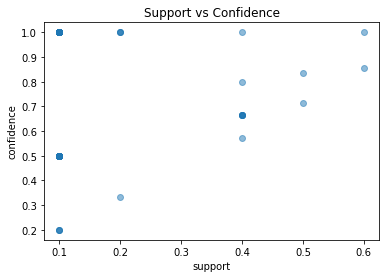

In [30]:
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

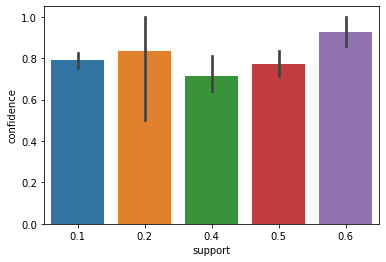

In [43]:
sns.barplot(x='support',y='confidence',data=rules1)

## 3. for support value = 0.05 and confidence value = 0.5,max length of itemset = 3

In [19]:
fre_item_sets2 = apriori(df=data1,min_support=0.05,use_colnames=True,max_len= 3)
fre_item_sets2.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [20]:
rules2 = association_rules(df = fre_item_sets2, metric='confidence',min_threshold=0.5)
rules2.sort_values(by='lift',ascending=False,inplace=True)
rules2.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
85,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
81,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
109,(Harry Potter1),"(LOTR2, Green Mile)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
50,"(Sixth Sense, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf
92,"(Green Mile, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf


In [21]:
rules2.shape

(110, 9)

## OBSERVATION

* Total 110 Rules have been ruled out. The top five rules with highest lift values states as follows:

   * (LOTR) and (Gladiator, Green Mile) are most likely to be watched together than just watching (Gladiator, Green Mile) alone
   * (Gladiator, Green Mile) and (LOTR) are most likely to be watched together than just watching (LOTR) alone
   * (LOTR2) and (Harry Potter1, Green Mile) are most likely to be watched together than just watching (Harry Potter1, Green Mile) alone
   * (Harry Potter1, LOTR1) and (LOTR2)	 are most likely to be watched together than just watching (LOTR2) alone
   * (Sixth Sense, LOTR2) and (Harry Potter1) are most likely to be watched together than just watching (Harry Potter1) alone

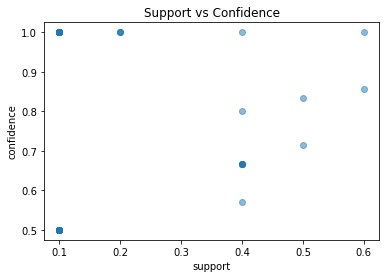

In [44]:
plt.scatter(rules2['support'], rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

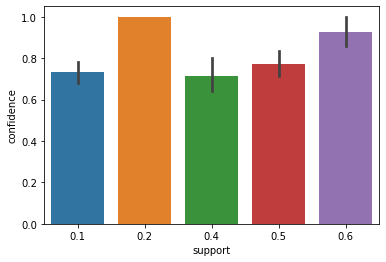

In [45]:
sns.barplot(x='support',y='confidence',data=rules2)

## 4. for support value = 0.02 and confidence value = 0.7,max length of itemset = 10

In [22]:
fre_item_sets3 = apriori(df=data1,min_support=0.02,use_colnames=True,max_len= 10)
fre_item_sets3.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [23]:
rules3 = association_rules(df = fre_item_sets3, metric='confidence',min_threshold=0.7)
rules3.sort_values(by='lift',ascending=False,inplace=True)
rules3.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
128,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
114,"(Sixth Sense, Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
113,"(LOTR2, Green Mile, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
85,"(LOTR2, Green Mile)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
84,"(LOTR2, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [24]:
rules3.shape

(129, 9)

## OBSERVATION

* Total 129 Rules have been ruled out. The top five rules with highest lift values states as follows:

   * (LOTR1, Sixth Sense)	and (Green Mile, LOTR2, Harry Potter1) are most likely to be watched together than just watching (Green Mile, LOTR2, Harry Potter1) alone
   * (LOTR2, Harry Potter1)	 and (Green Mile, LOTR1) are most likely to be watched together than just watching (Green Mile, LOTR1) alone
   * (Green Mile, LOTR2) and (LOTR1, Harry Potter1) are most likely to be watched together than just watching (Harry Potter1, Green Mile) alone
   * (LOTR2, Sixth Sense) and (LOTR1, Harry Potter1) are most likely to be watched together than just watching (LOTR1, Harry Potter1) alone
   * (LOTR2, Sixth Sense) and (Green Mile, Harry Potter1) are most likely to be watched together than just watching (Green Mile, Harry Potter1)	 alone

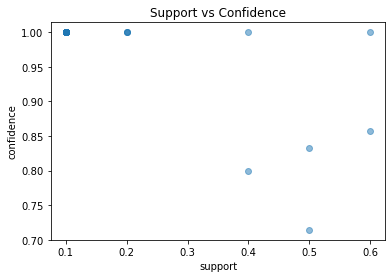

In [49]:
plt.scatter(rules3['support'], rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

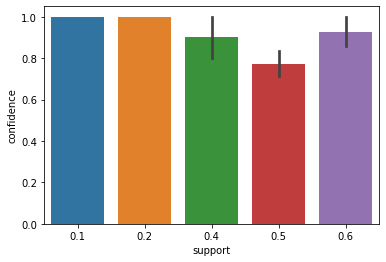

In [47]:
sns.barplot(x='support',y='confidence',data=rules3)

## 5. for support value = 0.01 and confidence value = 0.6,max length of itemset = 4

In [25]:
fre_item_sets4 = apriori(df=data1,min_support=0.01,use_colnames=True,max_len= 4)
fre_item_sets4.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [26]:
rules4 = association_rules(df = fre_item_sets4, metric='confidence',min_threshold=0.6)
rules4.sort_values(by='lift',ascending=False,inplace=True)
rules4.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
110,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
92,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
90,"(LOTR2, Green Mile)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
89,"(LOTR2, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
82,"(Green Mile, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [27]:
rules4.shape

(111, 9)

##  OBSERVATION

* Total 111 Rules have been ruled out. The top five rules with highest lift values states as follows:

   * (LOTR1, Harry Potter1)	and (Green Mile, LOTR2)	 are most likely to be watched together than just watching (Green Mile, LOTR2)	alone
   * (Green Mile, Gladiator) and (LOTR, Sixth Sense) are most likely to be watched together than just watching (LOTR, Sixth Sense)	alone
   * ((LOTR2, Harry Potter1) and (LOTR1, Sixth Sense) are most likely to be watched together than just watching (LOTR1, Sixth Sense) alone
   * (LOTR2, Sixth Sense) and (LOTR1, Harry Potter1) are most likely to be watched together than just watching (LOTR1, Harry Potter1) alone
   * (Green Mile, LOTR1) and (Sixth Sense, Harry Potter1) are most likely to be watched together than just watching (Sixth Sense, Harry Potter1)	 alone

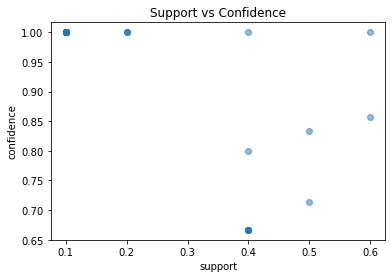

In [50]:
plt.scatter(rules4['support'], rules4['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

<AxesSubplot:xlabel='support', ylabel='confidence'>

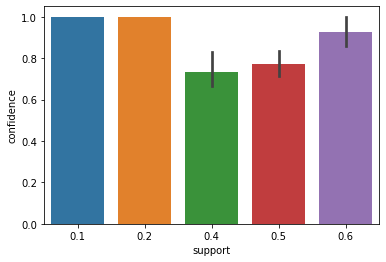

In [48]:
sns.barplot(x='support',y='confidence',data=rules4)